In [83]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
def load_pickle(file_path):
    with open(file_path,"rb") as file:
        return pickle.load(file)

In [5]:
dic = load_pickle('models/en/dic/apache.dic.pkl')

In [13]:
emb_matrix = keras.models.load_model('models/en/pretrain/ccasj.h5').get_layer('vetorizacao').get_weights()[0]

In [65]:
tsne = TSNE(n_components=2, verbose=1, n_iter=10000)
tsne_results = tsne.fit_transform(emb_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2002 samples in 0.009s...
[t-SNE] Computed neighbors for 2002 samples in 0.836s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2002
[t-SNE] Computed conditional probabilities for sample 2000 / 2002
[t-SNE] Computed conditional probabilities for sample 2002 / 2002
[t-SNE] Mean sigma: 2.797060
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.642670
[t-SNE] KL divergence after 8350 iterations: 2.289743


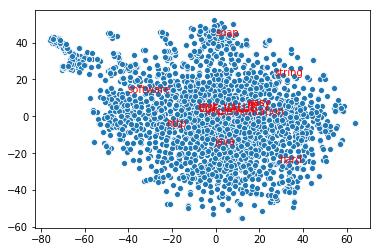

In [67]:
sns.scatterplot(tsne_results[:,0], tsne_results[:,1])
for i in ['EOF_VALUE', 'UNK_VALUE','java', 'hard', 'easy', 'software', 'string', 'implementation', 'soap', 'http', 'easy']:
    plt.annotate(i, (tsne_results[dic[i],0], tsne_results[dic[i],1]), color='red')

In [72]:
c = np.array([k for k in dic.keys()])

In [76]:
c[np.logical_and(tsne_results[:,0]<-70, tsne_results[:,1]>30)]

array(['do', '04', '6', 'execute', '@@', 'validation', 'relative',
       'persistent', 'auto', 'encoding="utf-8', 'program', 'scenario',
       'consider', 'mb', '2007', 'workaround', 'mechanism', 'memtable',
       'embedded', 'links', '-1', 'callback', 'messagecontext', 'calcite',
       'pom.xml', 'parking', 'var'], dtype='<U84')

In [64]:
dic['easy']

1014

In [ ]:
['java', 'c', 'implementation', 'soap', 'http']

In [54]:
dic['java']

72

In [137]:
int(np.random.binomial(1, 0.5))

0

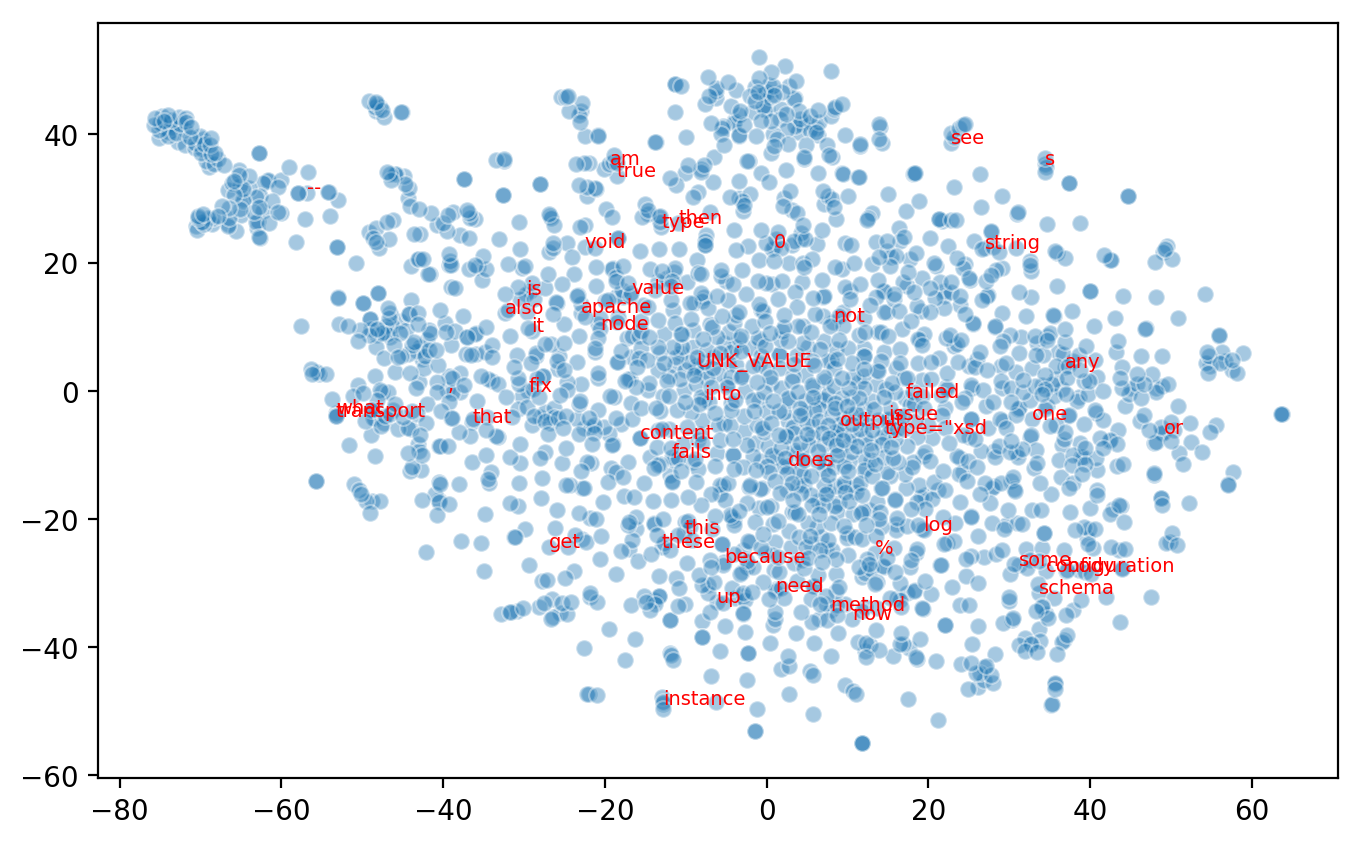

In [169]:
figura = plt.figure(figsize=(8, 5), dpi=200)
sns.scatterplot(tsne_results[:,0], tsne_results[:,1], alpha=0.4)
qtd = 0
for d, i in dic.items():
    if np.random.binomial(1, 0.2):
        plt.annotate(d, (tsne_results[i,0], tsne_results[i,1]), color='red', size=7)
        qtd += 1
    if qtd == 50:
        break

In [43]:
np.array([k for k in dic.keys()])[tsne_results[:,1]<-70]

array(['do', '04', '6', 'execute', '@@', 'validation', 'relative',
       'persistent', 'auto', 'encoding="utf-8', 'program', 'scenario',
       'consider', 'mb', '2007', 'workaround', 'mechanism', 'memtable',
       'embedded', 'links', '-1', 'callback', 'messagecontext',
       'java.lang.assertionerror', 'calcite', 'pom.xml', 'parking', 'var'],
      dtype='<U84')

In [149]:
k = KMeans(n_clusters=10, random_state=0).fit(tsne_results)

In [95]:
sns.scatterplot?

In [96]:
dic

{'EOF_VALUE': 0,
 'UNK_VALUE': 1,
 ')': 2,
 '.': 3,
 'the': 4,
 ':': 5,
 ',': 6,
 '"': 7,
 '-': 8,
 '/': 9,
 'to': 10,
 '>': 11,
 '=': 12,
 '<': 13,
 '(': 14,
 'a': 15,
 ']': 16,
 'in': 17,
 'at': 18,
 'is': 19,
 '{': 20,
 '}': 21,
 'and': 22,
 ';': 23,
 '[': 24,
 'of': 25,
 'for': 26,
 '*': 27,
 'i': 28,
 "'": 29,
 'this': 30,
 'not': 31,
 'it': 32,
 'that': 33,
 'be': 34,
 'with': 35,
 'on': 36,
 'if': 37,
 'code': 38,
 'as': 39,
 'from': 40,
 'we': 41,
 'when': 42,
 'by': 43,
 '|': 44,
 'are': 45,
 'should': 46,
 'an': 47,
 'can': 48,
 'message': 49,
 'error': 50,
 'have': 51,
 'info': 52,
 'but': 53,
 '1': 54,
 'using': 55,
 'wsdl': 56,
 'file': 57,
 'camel': 58,
 'will': 59,
 'element': 60,
 '#': 61,
 'does': 62,
 'use': 63,
 'or': 64,
 'new': 65,
 '0': 66,
 'which': 67,
 '+': 68,
 'test': 69,
 '...': 70,
 'method': 71,
 'java': 72,
 'exception': 73,
 "n't": 74,
 '?': 75,
 'null': 76,
 'class': 77,
 'type': 78,
 'string': 79,
 'so': 80,
 'client': 81,
 '_': 82,
 'there': 83,
 'has

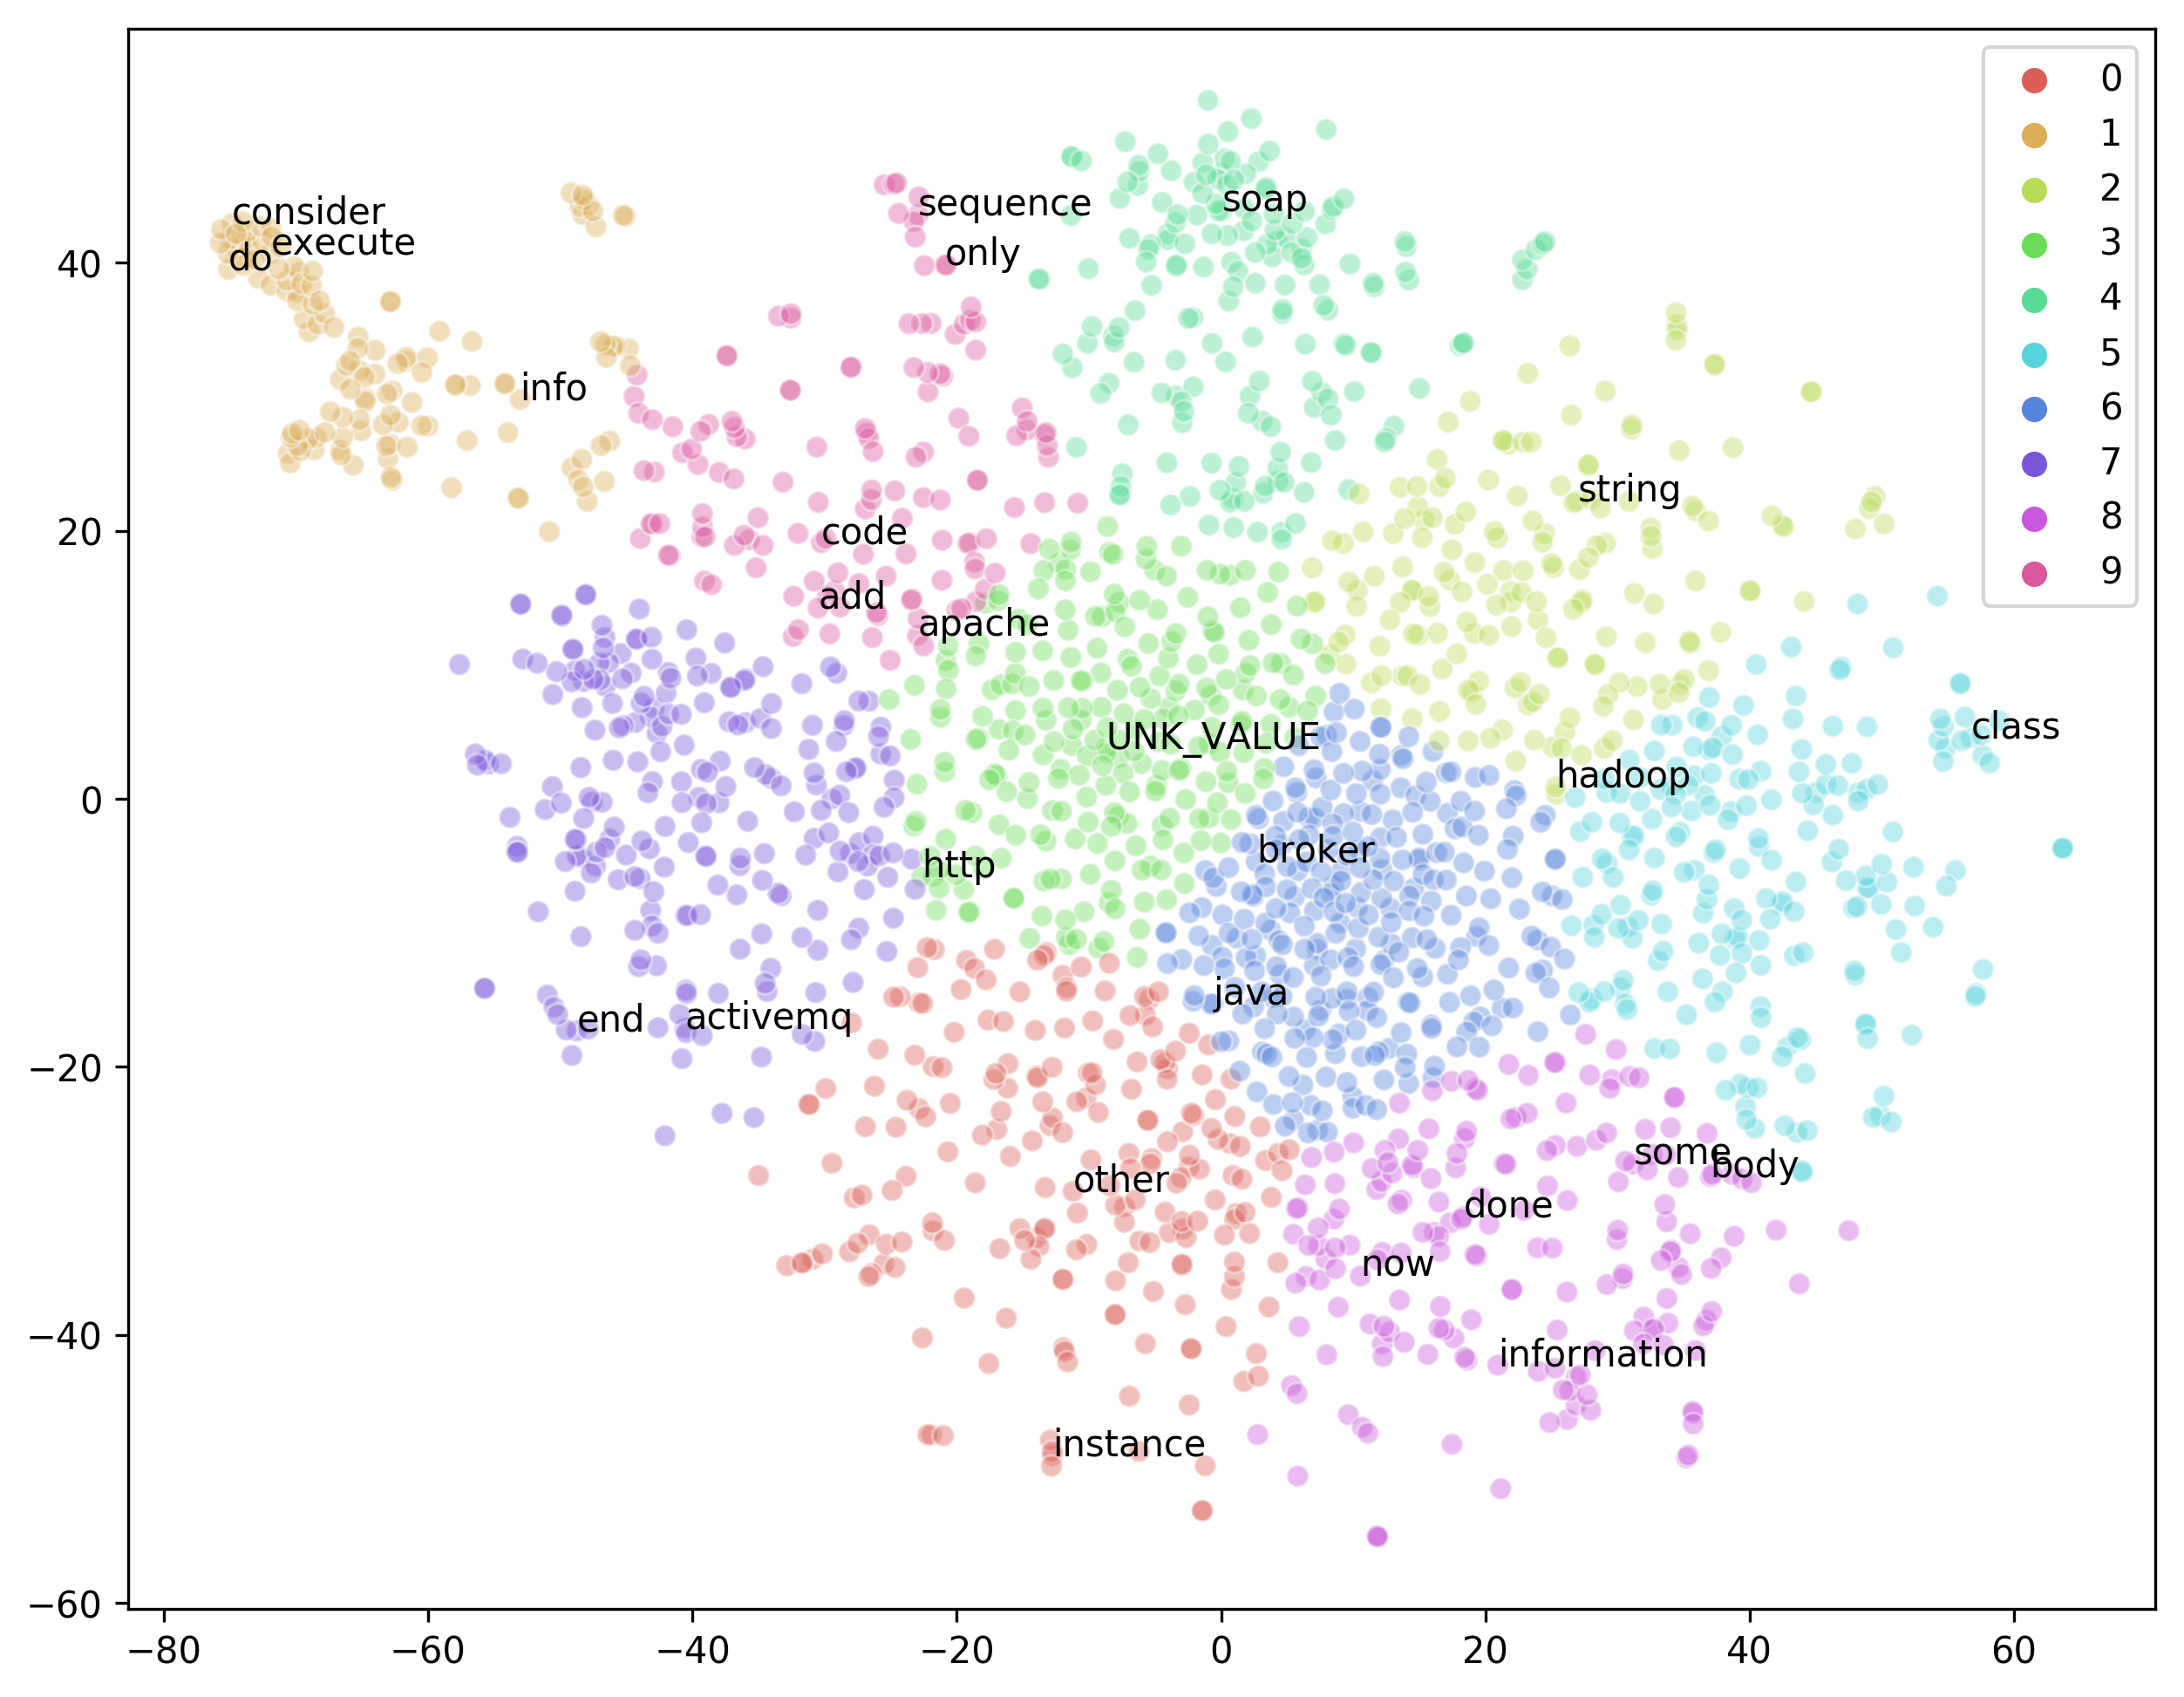

In [172]:
fig = plt.figure(figsize=(10,8), dpi=300)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=k.labels_,
    palette=sns.color_palette("hls", 10),
    alpha=0.4
)

for i in ['UNK_VALUE','instance', 'end', 'do', 'execute', 'http','code', 'some', 'body','only', 'apache','add', 'broker', 'sequence','hadoop', 'other', 'consider', 'info', 'java', 'string', 'class', 'soap', 'activemq', 'information', 'now', 'done']:
    plt.annotate(i, (tsne_results[dic[i],0], tsne_results[dic[i],1]), color='black')
fig.savefig("reports/figures/ccasj-tsne.pdf", bbox_inches='tight')